# Ford-Fulkerson Algorithm

The Naïve Algorithm, as an elementary approach to maximum flow problems, identifies any path from the source to the sink with available capacity and sends flow along it. It repeats this process without considering the optimization of the flow or the overall network structure beyond the immediate path. The Ford-Fulkerson algorithm, by contrast, iteratively searches for augmenting paths and crucially, adjusts not only the forward flow but also allows for the adjustment of inverse (or reverse) flow. This key differentiation significantly enhances the efficiency and outcome of flow optimization:

**Augmenting Path and Residual Network**: Ford-Fulkerson employes the same concept of a residual network, which dynamically adjusts to reflect remaining capacities after each flow augmentation. This network is used to continually find feasible paths from the source to the sink, taking into account the original capacities and the current flow.

**Reverse Flow**: One of the defining features of the Ford-Fulkerson algorithm is its handling of reverse flow. When flow is sent along a path, the algorithm not only reduces the capacity of the forward edges but also increases the capacity of the reverse edges in the residual network. This allows previously used capacity to be "recovered" or adjusted if found to be suboptimal in subsequent iterations. This avoid scenarios where early decisions may restrict later options. 

Here we use the example in Figure 3.1: An input for the max s-t flow problem.

<img src="maxFlowQ1.jpeg" alt="" width="400"/>

We could transform this graph to a table as follows:

$$
\begin{matrix}
   & S & A & B & C & D & E & T \\
 S & 0 & 3 & 1 & 1 & 0 & 0 & 0 \\
 A & 0 & 0 & 1 & 0 & 1 & 0 & 0 \\
 B & 0 & 1 & 0 & 0 & 0 & 3 & 0 \\
 C & 0 & 0 & 0 & 0 & 4 & 2 & 0 \\
 D & 0 & 0 & 0 & 0 & 0 & 0 & 4 \\
 E & 0 & 0 & 0 & 4 & 0 & 0 & 1 \\
 T & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{matrix}
$$

and hence generate a capacity matrix Q:

$$
Q=\left[
\begin{matrix}
 0 & 3 & 1 & 1 & 0 & 0 & 0 \\
 0 & 0 & 1 & 0 & 1 & 0 & 0 \\
 0 & 1 & 0 & 0 & 0 & 3 & 0 \\
 0 & 0 & 0 & 0 & 4 & 2 & 0 \\
 0 & 0 & 0 & 0 & 0 & 0 & 4 \\
 0 & 0 & 0 & 4 & 0 & 0 & 1 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{matrix}
\right]
$$

In [3]:
#pip install networkx matplotlib
import numpy as np
from collections import deque
from plotFlow import plot_graph_from_matrix, plot_graph_from_matrix_string, plot_graph_from_matrix_string2

**Step 1:** Find an augmenting path from $s$ to $t$ without considering the weight of each edge.

In [4]:
def bfs_path(graph, start, goal):
    queue = deque([(start, [start])])  # queue of (current node, path to current node)
    visited = set()
    visited.add(start)
    
    while queue:
        current, path = queue.popleft()
        if current == goal:
            return path
        for neighbor in range(len(graph[current])):
            if graph[current][neighbor] != 0 and neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, path + [neighbor]))
    return None  # return None if no path is found

**Step 2:** Calculates the minimum capacity along the path and then updates the residual of the edges, **add a reverse flow to the graph**.

In [5]:
def update_residual_graph(graph, path):
    min_capacity = float('inf')
    for i in range(len(path) - 1):
        start = path[i]
        end = path[i + 1]
        if graph[start][end] < min_capacity:
            min_capacity = graph[start][end]
    
    for i in range(len(path) - 1):
        start = path[i]
        end = path[i + 1]
        graph[start][end] -= min_capacity
        graph[end][start] += min_capacity #add a reverse flow
    return min_capacity


**Iteration** Repeat each step until there's no direct connections between node $s$ and $t$

Maximum flow: 4
Updated Residual Graph:
[0 1 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 1 0 0 0 1 0]
[0 0 0 0 2 2 0]
[0 0 0 0 0 0 1]
[0 0 0 3 0 0 0]
[0 0 0 0 0 0 0]


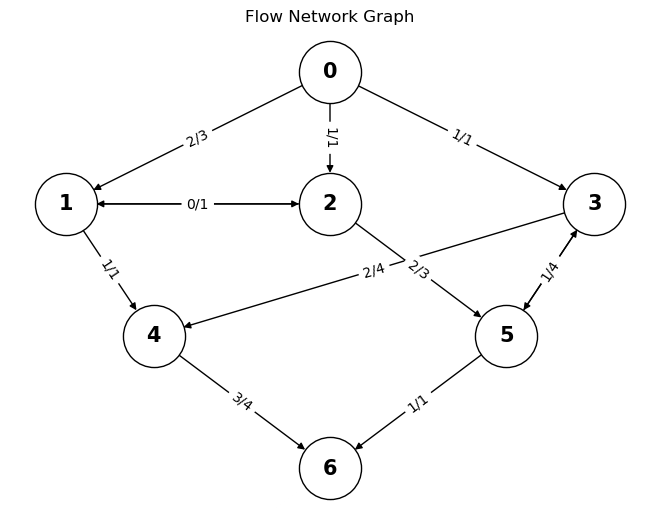

In [9]:
def main():
    # Example input matrix Q
    Q = np.array([
        [0, 3, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 3, 0],
        [0, 0, 0, 0, 4, 2, 0],
        [0, 0, 0, 0, 0, 0, 4],
        [0, 0, 0, 4, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0]
    ])
    
    residual_Q = Q.copy()  # Copy Q to use as the residual graph
    total_flow = 0
    source = 0  # Source node index
    sink = len(Q) - 1  # Sink node index

    while True:
        path = bfs_path(residual_Q, source, sink)
        if path is None:
            break
        flow = update_residual_graph(residual_Q, path)
        total_flow += flow

    print("Maximum flow:", total_flow)
    
    
    for i in range(Q.shape[0]):
        for j in range(Q.shape[1]):
            if residual_Q[i,j] > Q[i, j]:
                residual_Q[i,j] = Q[i, j]
                    
    print("Updated Residual Graph:")
    for row in residual_Q:
        print(row)
    
    # Compute the occupation matrix and format as fraction
    occupation_matrix = np.zeros_like(Q, dtype=object)
    for i in range(Q.shape[0]):
        for j in range(Q.shape[1]):
            if Q[i, j] != 0:
                usage = Q[i, j] - residual_Q[i, j]
                occupation_matrix[i, j] = f"{usage}/{Q[i, j]}"
            else:
                occupation_matrix[i, j] = '0'


    
    plot_graph_from_matrix_string2(occupation_matrix, source, sink)

if __name__ == '__main__':
    main()

The graph has overlappings, the flows are:
* 0 - 1/3 -> 1 - 1/1 -> 2 - 1/3 -> 5 - 1/1 -> 6
* 0 - 1/3 -> 1 - 1/1 -> 4 - 1/4 -> 6
* 0 - 1/1 -> 2 - 1/3 -> 5 - 1/4 -> 3 - 1/4 -> 4 - 1/4 -> 6
* 0 - 1/1 -> 3 - 1/4 -> 4 - 1/4 -> 6


Recall the example when the Naïve Algorithm cannot come with the optimal solution. Considering the capacity matrix:

$$
Q=\left[
\begin{matrix}
 0 & 4 & 2 & 0 & 0 & 0 \\
 0 & 0 & 1 & 2 & 4 & 0 \\
 0 & 0 & 0 & 0 & 2 & 0 \\
 0 & 0 & 0 & 0 & 0 & 3 \\
 0 & 0 & 0 & 0 & 0 & 3 \\
 0 & 0 & 0 & 0 & 0 & 0 \\
\end{matrix}
\right]
$$

The Ford-Fulkerson method can always find the maximum flow

Maximum flow: 5
Updated Residual Graph:
[0 0 1 0 0 0]
[0 0 1 2 0 0]
[0 0 0 1 0 0]
[0 0 0 0 0 0]
[0 0 0 0 0 1]
[0 0 0 0 0 0]


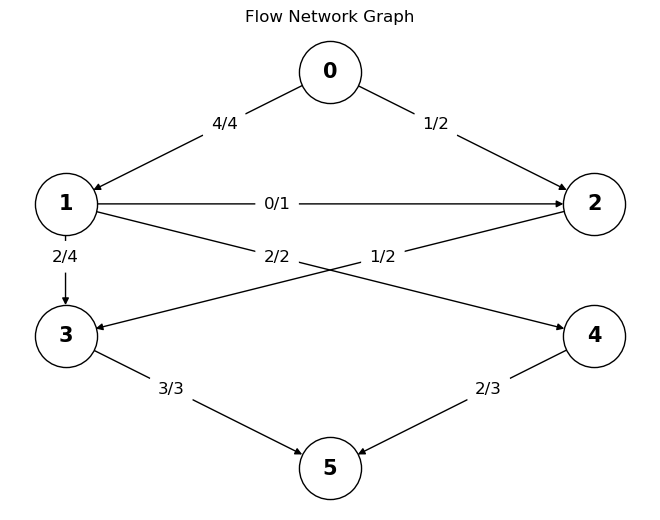

In [12]:
def main():
    # Example input matrix Q
    Q = np.array([[0, 4, 2, 0, 0, 0],
        [0, 0, 1, 4, 2, 0],
        [0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 3],
        [0, 0, 0, 0, 0, 3],
        [0, 0, 0, 0, 0, 0]])
    
    residual_Q = Q.copy()  # Copy Q to use as the residual graph
    total_flow = 0
    source = 0  # Source node index
    sink = len(Q) - 1  # Sink node index

    while True:
        path = bfs_path(residual_Q, source, sink)
        if path is None:
            break
        flow = update_residual_graph(residual_Q, path)
        total_flow += flow

    print("Maximum flow:", total_flow)
    
    
    for i in range(Q.shape[0]):
        for j in range(Q.shape[1]):
            if residual_Q[i,j] > Q[i, j]:
                residual_Q[i,j] = Q[i, j]
                    
    print("Updated Residual Graph:")
    for row in residual_Q:
        print(row)
    
    # Compute the occupation matrix and format as fraction
    occupation_matrix = np.zeros_like(Q, dtype=object)
    for i in range(Q.shape[0]):
        for j in range(Q.shape[1]):
            if Q[i, j] != 0:
                usage = Q[i, j] - residual_Q[i, j]
                occupation_matrix[i, j] = f"{usage}/{Q[i, j]}"
            else:
                occupation_matrix[i, j] = '0'


    
    plot_graph_from_matrix_string(occupation_matrix, source, sink)

if __name__ == '__main__':
    main()